## Loading

In [1]:
df = read.table('train.csv', header = TRUE, sep = ',')
df

X,Id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,native_country,income
1,A1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,A2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,A3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,A4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,A5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,A6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,A7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,A8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,A9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
10,A10,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Convert factor

In [2]:
df[,'age'] = factor(df[,'age'])
df[,'hr_per_week'] = factor(df[,'hr_per_week'])

sapply(df, class)

X             Id            age      workclass         fnlwgt 
     "integer"       "factor"       "factor"       "factor"      "integer" 
     education  education_num marital_status     occupation   relationship 
      "factor"      "integer"       "factor"       "factor"       "factor" 
          race            sex   capital_gain   capital_loss    hr_per_week 
      "factor"       "factor"      "integer"      "integer"       "factor" 
native_country         income 
      "factor"       "factor"

## bnlearn hand-crafted net

In [4]:
library(bnlearn)
library(forecast)
chosen_cols = c('income', 'sex', 'marital_status', 'education', 'hr_per_week')
net = empty.graph(chosen_cols)

In [5]:
arc.set = matrix(c("education", "income", "marital_status", "income", "education", "marital_status",
                  "education", "hr_per_week", "hr_per_week", "income", "sex", "income"),
          ncol = 2, byrow = TRUE,
          dimnames = list(NULL, c("from", "to")))
arc.set

from,to
education,income
marital_status,income
education,marital_status
education,hr_per_week
hr_per_week,income
sex,income


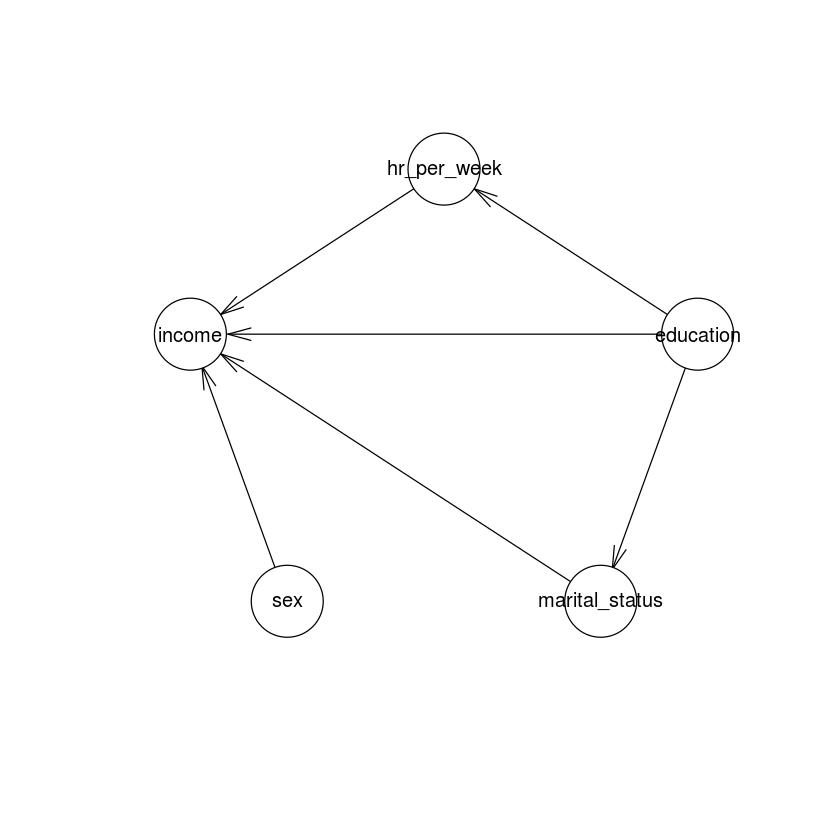

In [6]:
arcs(net) = arc.set
plot(net)

In [7]:
train_set = df[0:30000,chosen_cols]
test_set = df[30000:32561,chosen_cols]
fit = bn.fit(net, train_set , debug = TRUE)
fit

* fitting parameters of node income (discrete).
  > found parents: sex marital_status education hr_per_week 
  > fitted 42112 conditional probabilities.
* fitting parameters of node sex (discrete).
  > fitted 2 marginal probabilities.
* fitting parameters of node marital_status (discrete).
  > found parents: education 
  > fitted 112 conditional probabilities.
* fitting parameters of node education (discrete).
  > fitted 16 marginal probabilities.
* fitting parameters of node hr_per_week (discrete).
  > found parents: education 
  > fitted 1504 conditional probabilities.



  Bayesian network parameters

  Parameters of node income (multinomial distribution)

Conditional probability table:
 
, , marital_status = Divorced, education = 10th, hr_per_week = 1

       sex
income       Female Male
  <=50K 1.000000000     
  >50K  0.000000000     

, , marital_status = Married-AF-spouse, education = 10th, hr_per_week = 1

       sex
income  Female Male
  <=50K            
  >50K             

, , marital_status = Married-civ-spouse, education = 10th, hr_per_week = 1

       sex
income  Female        Male
  <=50K        1.000000000
  >50K         0.000000000

, , marital_status = Married-spouse-absent, education = 10th, hr_per_week = 1

       sex
income  Female Male
  <=50K            
  >50K             

, , marital_status = Never-married, education = 10th, hr_per_week = 1

       sex
income  Female Male
  <=50K            
  >50K             

, , marital_status = Separated, education = 10th, hr_per_week = 1

       sex
income  Female Male
  <=50K           

In [8]:
predicted = predict(fit, node = "income", data = test_set)

In [14]:
ts_test = ts(predicted)

In [18]:
truth = ts(test_set[, "income"])

In [19]:
accuracy(f=ts_test, x=truth)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.06946157,0.4399865,0.1935882,0.3699137,12.78257,-0.001206855,0.8024316


In [11]:
cbind(predicted, test_set[, "income"])

predicted,
1,1
1,1
1,1
NA,1
1,1
1,1
1,1
2,2
1,1
1,1
